In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.keys()

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
mapping = list()
encoder = LabelEncoder()

for column in range(len(df.columns)):
    df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]])
    mapping_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mapping.append(mapping_dict)

In [7]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


In [8]:
mapping

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [9]:
y = df['class']
x = df.drop('class', axis=1)

In [10]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.85)

In [11]:
x_train.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2709,5,3,3,1,5,1,0,0,9,1,...,2,7,7,0,2,1,4,2,4,0
1948,5,3,3,1,5,1,0,0,5,1,...,2,3,3,0,2,1,4,3,4,0
7495,3,2,4,0,7,1,0,1,0,1,...,1,7,6,0,2,1,0,7,4,4
6850,5,2,4,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,0
7913,0,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,4,4,2


In [12]:
x.shape

(8124, 22)

In [13]:
y.shape

(8124,)

In [14]:
x_train.shape

(1218, 22)

In [15]:
x_test.shape

(6906, 22)

In [16]:
y_test.shape

(6906,)

In [17]:
y_train.shape

(1218,)

In [18]:
lg = LogisticRegression()

In [19]:
lg.fit(x_test,y_test)

LogisticRegression()

In [20]:
lg.fit(x_train,y_train)

LogisticRegression()

In [21]:
pred=lg.predict(x_test)
print (pred)

[0 1 1 ... 0 0 1]


In [22]:
sv = SVC(C=1.0, kernel= 'rbf')
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128))

In [23]:
sv.fit(x_train,y_train)
nn_model.fit(x_train,y_train)
sv.fit(x_test,y_test)
nn_model.fit(x_test,y_test)

MLPClassifier(hidden_layer_sizes=(128, 128))

In [24]:
svpred=sv.predict(x_test)
nn_pred=nn_model.predict(x_test)


In [25]:
print("accuracy_score:SVM",accuracy_score(y_test,svpred,'/n'))
print(confusion_matrix(y_test,svpred))
print(classification_report(y_test,svpred))

accuracy_score:SVM 0.9917463075586447
[[3582    4]
 [  53 3267]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3586
           1       1.00      0.98      0.99      3320

    accuracy                           0.99      6906
   macro avg       0.99      0.99      0.99      6906
weighted avg       0.99      0.99      0.99      6906



In [26]:
print("accuracy_score:MLPClassifier",accuracy_score(y_test,nn_pred,'/n'))
print(confusion_matrix(y_test,nn_pred))
print(classification_report(y_test,nn_pred))

accuracy_score:MLPClassifier 1.0
[[3586    0]
 [   0 3320]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3586
           1       1.00      1.00      1.00      3320

    accuracy                           1.00      6906
   macro avg       1.00      1.00      1.00      6906
weighted avg       1.00      1.00      1.00      6906



In [27]:
print("accuracy_score:LogisticRegression",accuracy_score(y_test,pred,'/n'))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:LogisticRegression 0.9412105415580655
[[3412  174]
 [ 232 3088]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3586
           1       0.95      0.93      0.94      3320

    accuracy                           0.94      6906
   macro avg       0.94      0.94      0.94      6906
weighted avg       0.94      0.94      0.94      6906



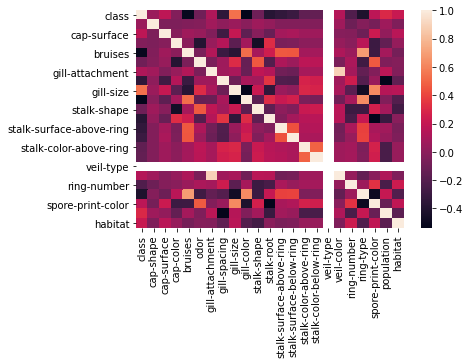

In [28]:
corr = df.corr()
sns.heatmap(corr)

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [30]:
y_pred_prob = lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.00455368, 0.95226081, 0.93069462, ..., 0.0250722 , 0.06402389,
       0.96913437])

In [31]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [32]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.78862242e-04,
       2.78862242e-04, 5.57724484e-04, 5.57724484e-04, 8.36586726e-04,
       8.36586726e-04, 1.11544897e-03, 1.11544897e-03, 1.39431121e-03,
       1.39431121e-03, 1.67317345e-03, 1.67317345e-03, 1.95203569e-03,
       1.95203569e-03, 2.23089794e-03, 2.23089794e-03, 2.50976018e-03,
       2.50976018e-03, 2.78862242e-03, 2.78862242e-03, 3.06748466e-03,
       3.06748466e-03, 3.34634690e-03, 3.34634690e-03, 3.62520915e-03,
       3.62520915e-03, 3.90407139e-03, 3.90407139e-03, 4.18293363e-03,
       4.18293363e-03, 4.46179587e-03, 4.46179587e-03, 4.74065811e-03,
       4.74065811e-03, 5.01952036e-03, 5.01952036e-03, 5.29838260e-03,
       5.29838260e-03, 5.57724484e-03, 5.57724484e-03, 5.85610708e-03,
       5.85610708e-03, 6.13496933e-03, 6.13496933e-03, 6.41383157e-03,
       6.41383157e-03, 6.69269381e-03, 6.69269381e-03, 6.97155605e-03,
       6.97155605e-03, 7.25041829e-03, 7.25041829e-03, 7.52928054e-03,
      

In [33]:
tpr

array([0.00000000e+00, 3.01204819e-04, 2.37349398e-01, 2.37349398e-01,
       2.51204819e-01, 2.51204819e-01, 2.56325301e-01, 2.56325301e-01,
       2.67168675e-01, 2.67168675e-01, 2.77710843e-01, 2.77710843e-01,
       2.80722892e-01, 2.80722892e-01, 2.88855422e-01, 2.88855422e-01,
       2.93674699e-01, 2.93674699e-01, 2.96987952e-01, 2.96987952e-01,
       2.98795181e-01, 2.98795181e-01, 3.21987952e-01, 3.21987952e-01,
       3.28614458e-01, 3.28614458e-01, 3.32530120e-01, 3.32530120e-01,
       3.35843373e-01, 3.35843373e-01, 3.38855422e-01, 3.38855422e-01,
       3.39457831e-01, 3.39457831e-01, 3.49096386e-01, 3.49096386e-01,
       3.54819277e-01, 3.54819277e-01, 3.56024096e-01, 3.56024096e-01,
       3.59337349e-01, 3.59337349e-01, 3.62349398e-01, 3.62349398e-01,
       3.63554217e-01, 3.63554217e-01, 3.65662651e-01, 3.65662651e-01,
       3.68975904e-01, 3.68975904e-01, 3.72891566e-01, 3.72891566e-01,
       3.80421687e-01, 3.80421687e-01, 3.91867470e-01, 3.91867470e-01,
      

In [34]:
thresholds

array([1.99982096e+00, 9.99820957e-01, 9.94071621e-01, 9.94067875e-01,
       9.93625580e-01, 9.93590309e-01, 9.93407109e-01, 9.93401569e-01,
       9.92908223e-01, 9.92870746e-01, 9.92448129e-01, 9.92420564e-01,
       9.92237949e-01, 9.92222701e-01, 9.91851023e-01, 9.91837939e-01,
       9.91609570e-01, 9.91585648e-01, 9.91420281e-01, 9.91366179e-01,
       9.91223407e-01, 9.91182444e-01, 9.89583580e-01, 9.89577882e-01,
       9.89034350e-01, 9.89028355e-01, 9.88739848e-01, 9.88726648e-01,
       9.88448828e-01, 9.88433478e-01, 9.88161649e-01, 9.88132776e-01,
       9.88033694e-01, 9.88010133e-01, 9.87091858e-01, 9.87051241e-01,
       9.86683648e-01, 9.86672533e-01, 9.86521758e-01, 9.86442392e-01,
       9.86148663e-01, 9.86090655e-01, 9.85732244e-01, 9.85729924e-01,
       9.85634051e-01, 9.85608224e-01, 9.85424589e-01, 9.85338859e-01,
       9.85021585e-01, 9.84958928e-01, 9.84571812e-01, 9.84569306e-01,
       9.83572941e-01, 9.83540744e-01, 9.82286306e-01, 9.82230840e-01,
      

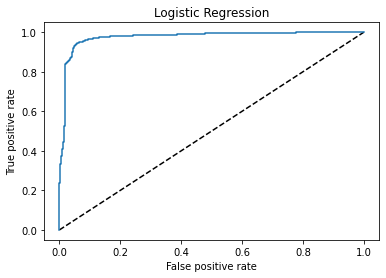

In [35]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(accuracy_score(y_test,p))

1.0


In [37]:
auc_score=roc_auc_score(y_test,dt.predict(x_test))

In [38]:
print(auc_score)

1.0


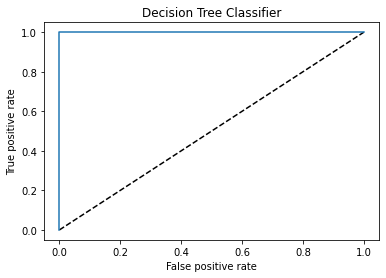

1.0

In [39]:
y_pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))
auc_score